In [1]:
import pandas as pd
df=pd.read_csv("D:\WPI\Machine Learning\Project\H-1B_Disclosure_RAW_Data_FY18.csv",encoding="Windows-1252")
pd.set_option('mode.chained_assignment', None)


C:\Users\kbvbh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,1/29/2018,2/2/2018,H-1B,7/28/2018,7/27/2021,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaN
1,I-200-17296-353451,CERTIFIED,10/23/2017,10/27/2017,H-1B,11/6/2017,11/6/2020,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaN
2,I-200-18242-524477,CERTIFIED,8/30/2018,9/6/2018,H-1B,9/10/2018,9/9/2021,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaN
3,I-200-18070-575236,CERTIFIED,NaN,3/30/2018,H-1B,9/10/2018,9/9/2021,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaN
4,I-200-18243-850522,CERTIFIED,8/31/2018,9/7/2018,H-1B,9/7/2018,9/6/2021,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaN


In [3]:
import numpy as np

In [4]:
df.loc[df.CASE_STATUS == 'DENIED','Target'] = 1
df['Target']=df['Target'].fillna(0)

In [5]:
# Find the missing values:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
CASE_NUMBER                         0
CASE_STATUS                         0
CASE_SUBMITTED                      1
DECISION_DATE                       0
VISA_CLASS                          0
EMPLOYMENT_START_DATE               7
EMPLOYMENT_END_DATE                11
EMPLOYER_NAME                      19
EMPLOYER_BUSINESS_DBA          600870
EMPLOYER_ADDRESS                   11
EMPLOYER_CITY                      11
EMPLOYER_STATE                     73
EMPLOYER_POSTAL_CODE               18
EMPLOYER_COUNTRY                    7
EMPLOYER_PROVINCE              647655
EMPLOYER_PHONE                      7
EMPLOYER_PHONE_EXT             620308
AGENT_REPRESENTING_EMPLOYER        18
AGENT_ATTORNEY_NAME                 0
AGENT_ATTORNEY_CITY            195242
AGENT_ATTORNEY_STATE           220906
JOB_TITLE                           5
SOC_CODE                           11
SOC_REVISED_CODE               650976
SOC_NAME                           11
NAICS_CODE             

In [6]:
# Printing unique values in each categorical columns
unique_df=pd.DataFrame(df.astype('object').describe(include='all').loc['unique', :])
unique_df

,unique
CASE_NUMBER,654360
CASE_STATUS,4
CASE_SUBMITTED,1299
DECISION_DATE,359
VISA_CLASS,4
EMPLOYMENT_START_DATE,1560
EMPLOYMENT_END_DATE,1637
EMPLOYER_NAME,70564
EMPLOYER_BUSINESS_DBA,11336
EMPLOYER_ADDRESS,63449


In [205]:




#f=['SMS','SMS Resp']
#data=data[data['TAG'].isin(f)]
#data.head()

#data=data[data['Decile']>5]
#data['Target']=data['Target'].astype(object)

#X_cat = data.drop(['Target',
#'PUBLIC_DISCLOSURE_LOCATION','CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE',
#'EMPLOYER_NAME','EMPLOYER_BUSINESS_DBA','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_POSTAL_CODE','EMPLOYER_PROVINCE',
#'EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','JOB_TITLE','SOC_CODE','SOC_NAME',
#'NAICS_CODE','PREVAILING_WAGE','PW_SOURCE_OTHER','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WORKSITE_CITY','WORKSITE_COUNTY',
#'WORKSITE_POSTAL_CODE','ORIGINAL_CERT_DATE'],axis=1).select_dtypes(include = object).copy()
X_cat = data.drop(['Target','EMPLOYER_ADDRESS','EMPLOYER_PHONE','PUBLIC_DISCLOSURE_LOCATION','ORIGINAL_CERT_DATE'],axis=1).select_dtypes(include = object).copy()

   
writer = pd.ExcelWriter('D:/WPI/Machine Learning/Project/Bivariate_1.xlsx', engine='xlsxwriter')
i=0

for col in X_cat:
    df1=pd.DataFrame(pd.crosstab(data[col],data['Target']))
    #df1=pd.DataFrame(pd.crosstab(data[col],data['Target']))
    df1['Event_Rate'] = df1.values[:,1]/np.sum(df1,axis=1)
    df1['Population'] = np.sum(df1.values[:,:2],axis= 1)/np.sum(df1.values[:,:2]) 
    if df1.shape[0]>50:
       df1=df1.sort_values(by=['Population'],ascending=False)[0:50]
    df1.to_excel(writer, sheet_name='Bivariate',startrow=i)
    i+=len(df1)+2
writer.save()


In [7]:
data=df

In [8]:
# Adding Visa Duration:
from datetime import datetime
data['Visa_duration']=pd.to_datetime(data['EMPLOYMENT_END_DATE'],infer_datetime_format=True)-pd.to_datetime(data['EMPLOYMENT_START_DATE'],infer_datetime_format=True)
#data['EMPLOYMENT_END_DATE']-data['EMPLOYMENT_START_DATE']
data['Visa_duration']=data['Visa_duration'].dt.days


In [9]:
data.dtypes

CASE_NUMBER                     object
CASE_STATUS                     object
CASE_SUBMITTED                  object
DECISION_DATE                   object
VISA_CLASS                      object
EMPLOYMENT_START_DATE           object
EMPLOYMENT_END_DATE             object
EMPLOYER_NAME                   object
EMPLOYER_BUSINESS_DBA           object
EMPLOYER_ADDRESS                object
EMPLOYER_CITY                   object
EMPLOYER_STATE                  object
EMPLOYER_POSTAL_CODE            object
EMPLOYER_COUNTRY                object
EMPLOYER_PROVINCE               object
EMPLOYER_PHONE                  object
EMPLOYER_PHONE_EXT              object
AGENT_REPRESENTING_EMPLOYER     object
AGENT_ATTORNEY_NAME             object
AGENT_ATTORNEY_CITY             object
AGENT_ATTORNEY_STATE            object
JOB_TITLE                       object
SOC_CODE                        object
SOC_REVISED_CODE               float64
SOC_NAME                        object
NAICS_CODE               

In [10]:
data['EMPLOYER_NAME_BIN']=data['EMPLOYER_NAME']

In [11]:

data['EMPLOYER_NAME_BIN'] = np.where(df['EMPLOYER_NAME'].isin(["NTT DATA, INC.",
                                        "GOOGLE LLC",
                                        "KPMG LLP",
                                        "PAYPAL, INC.",
                                        "GOLDMAN SACHS & CO. LLC",
                                        "DELOITTE & TOUCHE LLP",
                                        "TESLA, INC.",
                                        "VMWARE, INC.",
                                        "APPLE INC.",
                                        "POPULUS GROUP LLC",
                                        "EBAY INC.",
                                        "JPMORGAN CHASE & CO.",
                                        "DELOITTE CONSULTING LLP"]), 'Bin1',
                                        
                            np.where(df['EMPLOYER_NAME'].isin(["AMAZON WEB SERVICES, INC.",
                                        "BANK OF AMERICA N.A.",
                                        "IBM CORPORATION",
                                        "ERNST & YOUNG U.S. LLP",
                                        "FACEBOOK, INC.",
                                        "VIRTUSA CORPORATION",
                                        "V-SOFT CONSULTING GROUP, INC",
                                        "AMAZON.COM SERVICES, INC.",
                                        "SALESFORCE.COM INC.",
                                        "IBM INDIA PRIVATE LIMITED",
                                        "PRICEWATERHOUSECOOPERS LLP",
                                        "COMPUNNEL SOFTWARE GROUP, INC."]), 'Bin2',
                                         
                            np.where(df['EMPLOYER_NAME'].isin(["PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC",
                                        "LINKEDIN CORPORATION",
                                        "PEOPLE TECH GROUP INC.",
                                        "KFORCE INC.",
                                        "MASTECH DIGITAL TECHNOLOGIES, INC.",
                                        "A MASTECH DIGITAL, INC. COMPANY",
                                        "L&T TECHNOLOGY SERVICES LIMITED",
                                        "INTEL CORPORATION",
                                        "LARSEN & TOUBRO INFOTECH LIMITED",
                                        "UST GLOBAL INC.",
                                        "CAPGEMINI AMERICA INC",
                                        "WIPRO LIMITED",
                                        "WAL-MART ASSOCIATES, INC."]), 'Bin3',
                                        
                            np.where(df['EMPLOYER_NAME'].isin(["TATA CONSULTANCY SERVICES LIMITED",
                                        "RANDSTAD TECHNOLOGIES, LLC",
                                        "SYNTEL INC",
                                        "HCL AMERICA, INC.",
                                        "TECH MAHINDRA (AMERICAS),INC.",
                                        "ACCENTURE LLP"]), 'Bin4',
                                        
                            np.where(df['EMPLOYER_NAME'].isin(["COGNIZANT TECHNOLOGY SOLUTIONS US CORP",
                                        "INFOSYS LIMITED",
                                        "MICROSOFT CORPORATION",
                                        "COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION",
                                        "HEXAWARE TECHNOLOGIES, INC.",
                                        "UBER TECHNOLOGIES, INC.",
                                        "MINDTREE LIMITED"]), 'Bin5',
                                                 'Others')))))
                                        
                                            






In [12]:

def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [13]:
data=data[data['CASE_STATUS'] != 'WITHDRAWN']

In [14]:
data['EMPLOYER_CITY_BIN']=data['EMPLOYER_CITY']

In [15]:

data['EMPLOYER_CITY_BIN'] = np.where(data['EMPLOYER_CITY'].isin(["BROOKLYN",
                                                    "LOS ANGELES",
                                                    "OVERLAND PARK",
                                                    "MIAMI",
                                                    "JACKSONVILLE",
                                                    "LAS VEGAS",
                                                    "BOSTON",
                                                    "WASHINGTON",
                                                    "DETROIT",
                                                    "AUSTIN",
                                                    "SAN DIEGO",
                                                    "COLUMBUS",
                                                    "NEW YORK"]), 'Bin1',
                                        
                            np.where(data['EMPLOYER_CITY'].isin(["CHICAGO",
                                                        "IRVINE",
                                                        "MINNEAPOLIS",
                                                        "FOSTER CITY",
                                                        "INDIANAPOLIS",
                                                        "MOUNTAIN VIEW",
                                                        "WILMINGTON",
                                                        "ROCHESTER",
                                                        "HOUSTON",
                                                        "ATLANTA",
                                                        "NEWARK",
                                                        "PHOENIX",]), 'Bin2',
                                         
                            np.where(data['EMPLOYER_CITY'].isin(["CAMBRIDGE",
                                                            "MILPITAS",
                                                            "SAN JOSE",
                                                            "NAPERVILLE",
                                                            "CINCINNATI",
                                                            "WESTBOROUGH",
                                                            "LOUISVILLE",
                                                            "SAN FRANCISCO",
                                                            "MEMPHIS",
                                                            "SPRINGFIELD",
                                                            "MILWAUKEE",
                                                            "SEATTLE",
                                                            "CUPERTINO",
                                                            "COLUMBIA",
                                                            "STERLING",
                                                            "FAIRFAX",
                                                            "RESTON",
                                                            "ALPHARETTA",
                                                            "SAN MATEO",
                                                            "CARY",
                                                            "DULUTH",
                                                            "ROUND ROCK"]), 'Bin3',
                                        
                            np.where(data['EMPLOYER_CITY'].isin(["DURHAM",
                                                        "MENLO PARK",
                                                        "JERSEY CITY",
                                                        "NASHVILLE",
                                                        "PHILADELPHIA",
                                                        "PALO ALTO",
                                                        "ST. LOUIS",
                                                        "BELLEVUE",
                                                        "BURLINGTON",
                                                        "PLEASANTON",
                                                        "CHARLOTTE",
                                                        "SANTA CLARA",
                                                        "PITTSBURGH"]), 'Bin4',
                                        
                            np.where(data['EMPLOYER_CITY'].isin(["RICHMOND",
                                                        "FRISCO",
                                                        "RICHARDSON",
                                                        "DALLAS",
                                                        "SOMERSET",
                                                        "OMAHA",
                                                        "DUBLIN",
                                                        "CHANTILLY",
                                                        "SCHAUMBURG",
                                                        "ANN ARBOR",
                                                        "FARMINGTON HILLS",
                                                        "SECAUCUS",
                                                        "NORTH BRUNSWICK",
                                                        "FREMONT",
                                                        "IRVING",
                                                        "SOUTHFIELD",
                                                        "PRINCETON",
                                                        "TAMPA"]), 'Bin5',
                                     
                            np.where(data['EMPLOYER_CITY'].isin(["SUNNYVALE",
                                                            "HERNDON",
                                                            "ASHBURN",
                                                            "EDISON",
                                                            "REDWOOD CITY",
                                                            "TROY",
                                                            "ALISO VIEJO",
                                                            "PLAINSBORO",
                                                            "PLANO",
                                                            "PISCATAWAY",
                                                            "SUNRISE"]), 'Bin6',
                                     
                                     
                                     
                            np.where(data['EMPLOYER_CITY'].isin(["MOON TOWNSHIP",
                                                            "WOBURN",
                                                            "SOUTH PLAINFIELD",
                                                            "EAST BRUNSWICK",
                                                            "ROCKVILLE",
                                                            "ISELIN",
                                                            "REDMOND",
                                                            "BENTONVILLE",
                                                            "COLLEGE STATION"]), 'Bin7',                                   
                                                                      'Others')))))))
                                        
                                            






In [16]:
data['AGENT_ATTORNEY_CITY_BIN']=data['AGENT_ATTORNEY_CITY']

In [17]:
data['AGENT_ATTORNEY_CITY_BIN'] = np.where(data['AGENT_ATTORNEY_CITY'].isin(['FLUSHING','ORLANDO','FORT LAUDERDALE','KANSAS CITY','RALEIGH','WILTON','CHARLOTTE','MIAMI','CORAL GABLES','PORTLAND','RICHARDSON','MEMPHIS','BALTIMORE','SAN DIEGO','NEWARK','MILWAUKEE','COLUMBUS','WOODLAND HILLS','MCLEAN','LOS ANGELES','CINCINNATI','VANCOUVER','DALLAS','MINNEAPOLIS','HOUSTON','MADISON','DENVER','ANN ARBOR','AUSTIN','MATAWAN','HARTFORD','ARLINGTON']), 'Bin1',
                                        
                            np.where(data['AGENT_ATTORNEY_CITY'].isin(['ATLANTA','SANTA MONICA','SEATTLE','COLUMBIA','RICHMOND','TAMPA','ALLEN','PHOENIX','NEW YORK','JACKSONVILLE','SANTA CLARA','IRVINE',]), 'Bin2',
                                         
                            np.where(data['AGENT_ATTORNEY_CITY'].isin(['FREMONT','ENOLA','PHILADELPHIA','LAKE SUCCESS','SALT LAKE CITY','TORONTO','OAKLAND','DULUTH','OMAHA','BOSTON','SAN JOSE',]), 'Bin3',
                                        
                            np.where(data['AGENT_ATTORNEY_CITY'].isin(['SAN FRANCISCO','CHICAGO','ST. LOUIS','ROCKVILLE','LOS ALTOS','CLEVELAND','GAINESVILLE','WASHINGTON','ADDISON','PITTSBURGH','TROY','HERNDON','BUFFALO','INDIANAPOLIS','POTOMAC','CLAWSON','TRUMBULL','WHITE PLAINS','FRAMINGHAM','DETROIT','PRINCETON','IRVING','CAMBRIDGE',]), 'Bin4',
                                        
                            np.where(data['AGENT_ATTORNEY_CITY'].isin(['BLOOMFIELD HILLS','CERRITOS','OWINGS MILLS','ALPHARETTA','SUWANEE','EDISON','GAITHERSBURG','CALABASAS HILLS','LIVONIA','HAMDEN','ISELIN','RESTON','WORCESTER','SCHAUMBURG','WEST BLOOMFIELD','ASHBURN','WOBURN','FARMINGTON HILLS','EAST BRUNSWICK','DUBLIN','SOUTH PLAINFIELD',]), 'Bin5','Others')))))


In [18]:
data['AGENT_ATTORNEY_STATE_BIN']=data['AGENT_ATTORNEY_STATE']

In [19]:
data['AGENT_ATTORNEY_STATE_BIN'] = np.where(data['AGENT_ATTORNEY_STATE'].isin(['WV','MP','WY','NH','NV','PR','KS','AK','NM','IA','KY','TN','ID','GU','OK','FL','MS','AL','NC','WA','VT','SC','HI','ME','OR','MN','LA','WI','CO','TX']), 'Bin1',
                                        
                            np.where(data['AGENT_ATTORNEY_STATE'].isin(['IN','AR','MO','RI','UT','OH','PA','NE','NY']), 'Bin2',
                                         
                            np.where(data['AGENT_ATTORNEY_STATE'].isin(['AZ','CA']), 'Bin3',
                                        
                            np.where(data['AGENT_ATTORNEY_STATE'].isin(['GA','CT','MD','VA','NJ']), 'Bin4',
                                     
                            np.where(data['AGENT_ATTORNEY_STATE'].isin(['MA','IL','DC']), 'Bin5','Others')))))


In [20]:
data['PREVAILING_WAGE']=np.where((data['PW_UNIT_OF_PAY'].isin(['Hour'])),data['PREVAILING_WAGE']*40*52,data['PREVAILING_WAGE'])
data['PREVAILING_WAGE']=np.where((data['PW_UNIT_OF_PAY'].isin(['Month'])),data['PREVAILING_WAGE']*12,data['PREVAILING_WAGE'])
data['PREVAILING_WAGE']=np.where((data['PW_UNIT_OF_PAY'].isin(['Week'])),data['PREVAILING_WAGE']*52,data['PREVAILING_WAGE'])
data['PREVAILING_WAGE']=np.where((data['PW_UNIT_OF_PAY'].isin(['Bi-Weekly'])),data['PREVAILING_WAGE']*26,data['PREVAILING_WAGE'])

In [21]:
data['PREVAILING_WAGE'][data['PREVAILING_WAGE']==0]=np.mean(data['PREVAILING_WAGE'])

In [22]:
data['PREVAILING_WAGE'][data['PREVAILING_WAGE']>300000]=np.mean(data['PREVAILING_WAGE'])

In [23]:
data['PREVAILING_WAGE_BIN'] = data['PREVAILING_WAGE']

In [24]:
data['PREVAILING_WAGE_BIN'] = np.where(data['PREVAILING_WAGE']<=37003 , 'Bin1',
                                        
                            np.where(data['PREVAILING_WAGE']< 41627, 'Bin2',
                                         
                            np.where(data['PREVAILING_WAGE'] < 56534, 'Bin3',
                                        
                            np.where(data['PREVAILING_WAGE'] <= 126382, 'Bin4',
                                        
                             'Bin5'))))


In [25]:
data['WORKSITE_CITY_BIN']=data['WORKSITE_CITY']

In [26]:
data['WORKSITE_CITY_BIN'] = np.where(data['WORKSITE_CITY'].isin(["NEWYORK",
                                        "CHICAGO",
                                        "HOUSTON",
                                        ]), 'Bin1',
                                        
                            np.where(data['WORKSITE_CITY'].isin(["ATLANTA",
                                        "MOUNTAIN VIEW",
                                        "DALLAS",
                                        "AUSTIN",
                                        "BOSTON",
                                        "IRVING",
                                        "CHARLOTTE",
                                        "BELLEVUE"
                                        ]), 'Bin2',
                                         
                            np.where(data['WORKSITE_CITY'].isin(["COLUMBUS",
                                        "LOS ANGELES",
                                        "JERSEY CITY",
                                        "ALPHARETTA",
                                        "IRVINE",
                                        "FREMONT",
                                        "MENLO PARK",
                                        "MINNEAPOLIS",
                                        "MCLEAN",
                                        "CAMBRIDGE",
                                        "MIAMI",
                                        "INDIANAPOLIS",
                                        "DURHAM","BROOKLYN","CUPERTINO","JACKSONVILLE","DEARBORN","BENTONVILLE","NEWARK","AURBURN HILLS","EDISON","DETROIT","FORTWORTH"]), 'Bin3',
                                        
                            np.where(data['WORKSITE_CITY'].isin(["MILPITAS",
                                        "CINCINATTI",
                                        "BALTIMORE",
                                        "BLOOMINGTON",
                                        "HARTFORD",
                                        "FRISCO","NASHVILLE","LAKE MARY","MEMPHIS","DENVER","COLUMBIA","LOUISVILLE","MADISON","HERNDON","MILWAUKEE","CARY","DUBLIN","MALVERN","ANN ARBOR", "FOSTER CITY","ARLINGTON","FARMINGTON HILLS","DEERFIELD","ENGLEWOOD","NORFOLK","CLEVELAND","BURLINGTON","HILLSBORO","EL SEGUNDO","BETHESDA","KANSAS CITY","LAS VEGAS","MORRISVILLE","ALBANY","OAKLAND","COLLIERVILLE","FRANKLIN","BRIDGEWATER","BEAVERTON","HOBOKEN","MASON","MIDDLETON","NOVI","BOTHELL",'ISELIN',"BRONX","CHANDLER","EAGAN","MECHANICSBURG","LEXINGTON","ASHBURN","GREENWOOD VILLAGE","HARRISBURG","BUFFALO","NAPPERVILLE","LONG ISLAND CITY",
                                        "GREENSBORO",
                                        "NORTH KANSAS CITY ",
                                        "EDEN PRAIRIE",
                                        "ADDISON",
                                        "GREENVILLE",
                                        "DES MOINES","BIRMINGHAM","LIVONIA","FRAMINGHAM"]), 'Bin4','Others'))))
                                        



In [27]:
data['NAICS_CODE_BIN']=data['NAICS_CODE']

In [28]:
data['NAICS_CODE_BIN'] = np.where(data['NAICS_CODE'].isin(['611110','621111','622110','54121','523920','541710','541330','511210','334413','522320','334111','611310','541690','518210','551112','541990','541211','54161']), 'Bin1',
                                        
                            np.where(data['NAICS_CODE'].isin(['541519','5415','54151','336111','522110','523110','541611','541512','454111','518112']), 'Bin2',
                                     
                            np.where(data['NAICS_CODE'].isin(['541511']), 'Bin3','Others')))


In [29]:
data['WORKSITE_COUNTY_BIN']=data['WORKSITE_COUNTY']

In [30]:
data['WORKSITE_COUNTY_BIN'] = np.where(data['WORKSITE_COUNTY'].isin(["SANTACLARA","NEWYORK","KING",
                                        "MIDDLESEX",
                                        "DALLAS","SAN FRANCISCO",
                                        "COOK",
                                        "LOS ANGELES"
                                        ]), 'Bin1',
                                        
                            
                                         
                            np.where(data['WORKSITE_COUNTY'].isin([
                                        "FULTON",
                                        "HARRIS",
                                        "SAN MATEO",
                                        "SUFOLK",
                                        "ALAMEDA",
                                        "MARICOPA",
                                        "COLLIN",
                                        "ORANGE",
                                        
                                        ]), 'Bin2',
                                        
                            np.where(data['WORKSITE_COUNTY'].isin(["MONTGOMERY",
                                        "OAKLND",
                                        "FAIRFAX",
                                        "PHILADEPHIA",
                                        "HUDSON",
                                        "MCKLENBERG","TRAVIS","WAYNE","HENNEPIN","FRANKLIN","SAN DIEGO","SOMERSET","HILLSBOROUGH"
"ALLEGHENY",
"LAKE"
"WAKE",
"HARTFORD",
"WASHINGTON",
"MERCER",
"BERGEN",
"NEW CASTLE",
"MIAMI-DADE",
"HAMILTON",
"TARRANT",
"MORRIS",
"JEFFERSON",
"DURHAM",
"FAIRFIELD",
"DISTRICT OF COLUMBIA",
"SHELBY",
"CHESTER",
"BENTON",
"ESSEX",
"MARION",
"NORFOLK",
"WILLIAMSON",
"DUPAGE",
"ARAPAHOE",
"DOUGLAS",
"CUYAHOGA",

]), 'Bin3',
                                      np.where(data['WORKSITE_COUNTY'].isin(["BALTIMORE",
"JOHNSON",
"DAVIDSON",
"KINGS",
"ST. LOUIS"
"DELAWARE",
"HENRICO",
"QUEENS",
"LOUDOUN",
"DEKALB",
"GWINNETT",
"WORCESTER",
"DENTON",
"DENVER",
"DANE",
"POLK",
"WESTCHESTER",
"WASHTENAW",
"NASSAU",
"ERIE",
"CALIFORNIA",
"RAMSEY",
"CUMBERLAND",
"JACKSON",
"PINELLAS",
"MONROE",
"MACOMB",
"MULTNOMAH",
"MONMOUTH",
"BALTIMORE CITY",
"SAINT LOUIS","CONTRA COSTA",
"BEXAR",
"SALT LAKE",
"COBB",
"DUVAL"
"MILWAUKEE",
"BROWARD",
"SEMINOLE",
"UNION",
"SACRAMENTO",
"PROVIDENCE"]), 'Bin4'
                                        
,'Others'))))
                                        


In [31]:
data['Visa_duration_bin']=data['Visa_duration']

In [32]:
data['Visa_duration_bin'] = np.where(data['Visa_duration']<=366 , '<1yr',
                                        
                            np.where(data['Visa_duration']< 740, '1-2 yrs',
                                         
                            np.where(data['Visa_duration'] < 1100, '2-3 yrs',
                                                                              
                             '3+ yrs')))

In [33]:
data['SOC_REVISED_CODE']=data['SOC_REVISED_CODE'].astype('object')
data['NEW_EMPLOYMENT']=data['NEW_EMPLOYMENT'].astype('object')
data['CONTINUED_EMPLOYMENT']=data['CONTINUED_EMPLOYMENT'].astype('object')
data['CHANGE_PREVIOUS_EMPLOYMENT']=data['CHANGE_PREVIOUS_EMPLOYMENT'].astype('object')
data['NEW_CONCURRENT_EMP']=data['NEW_CONCURRENT_EMP'].astype('object')
data['CHANGE_EMPLOYER']=data['CHANGE_EMPLOYER'].astype('object')
data['AMENDED_PETITION']=data['AMENDED_PETITION'].astype('object')



In [34]:
dfsoc=pd.read_csv("D:\WPI\Machine Learning\Project\Copy of SOC_CODE Revised Column.csv",encoding="Windows-1252")
pd.set_option('mode.chained_assignment', None)


C:\Users\kbvbh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
dfsoc['SOC_CODE']=dfsoc['SOC_CODE'].str[0:2]

In [36]:
data['SOC_REVISED_CODE']=dfsoc['SOC_CODE']

In [37]:
data['EMPLOYER_STATE_BIN']=data['EMPLOYER_STATE']
data['EMPLOYER_STATE_BIN'] = np.where(data['EMPLOYER_STATE'].isin(['CA'
                                        ]), 'Bin1',
                                        
                            np.where(data['EMPLOYER_STATE'].isin(["NJ"
                                      
                                        ]), 'Bin2',
                                         
                            np.where(data['EMPLOYER_STATE'].isin(["TX",
                                       ]), 'Bin3',
                                        
                            np.where(data['EMPLOYER_STATE'].isin(["NY",
                                        "IL"]), 'bin4',
                                      np.where(data['EMPLOYER_STATE'].isin(["PA",
                                        "MI"
                                        ]), 'bin5',
                                                np.where(data['EMPLOYER_STATE'].isin(["MA",
                                        "MD",'WA']), 'bin6',
                                        
                                        
                                        
                            np.where(data['EMPLOYER_STATE'].isin(["VA",
                                        "FL","GA"
                                        ]), 'Bin7',
                                                 'Others')))))))


In [38]:
data['NEW_EMPLOYMENT_BIN'] = data['NEW_EMPLOYMENT']
data['NEW_EMPLOYMENT_BIN'] = np.where(data['NEW_EMPLOYMENT'].isin([0]), '0',
                             np.where(data['NEW_EMPLOYMENT'].isin([1]), '1', '>1'))
                                      

In [39]:
data['CONTINUED_EMPLOYMENT_BIN'] = data['CONTINUED_EMPLOYMENT']
data['CONTINUED_EMPLOYMENT_BIN'] = np.where(data['CONTINUED_EMPLOYMENT'].isin([0]), '0',
                             np.where(data['CONTINUED_EMPLOYMENT'].isin([1]), '1', '>1'))
                                      

In [40]:
data['CHANGE_PREVIOUS_EMPLOYMENT_BIN'] = data['CHANGE_PREVIOUS_EMPLOYMENT']
data['CHANGE_PREVIOUS_EMPLOYMENT_BIN'] = np.where(data['CHANGE_PREVIOUS_EMPLOYMENT'].isin([0]), '0',
                             np.where(data['CHANGE_PREVIOUS_EMPLOYMENT'].isin([1]), '1', '>1'))

In [41]:
data['NEW_CONCURRENT_EMP_BIN'] = data['NEW_CONCURRENT_EMP']
data['NEW_CONCURRENT_EMP_BIN'] = np.where(data['NEW_CONCURRENT_EMP'].isin([0]), '0',
                             np.where(data['NEW_CONCURRENT_EMP'].isin([1]), '1', '>1'))

In [42]:
data['CHANGE_EMPLOYER_BIN'] = data['CHANGE_EMPLOYER']
data['CHANGE_EMPLOYER_BIN'] = np.where(data['CHANGE_EMPLOYER'].isin([0]), '0',
                             np.where(data['CHANGE_EMPLOYER'].isin([1]), '1', '>1'))

In [43]:
data['AMENDED_PETITION_BIN'] = data['AMENDED_PETITION']
data['AMENDED_PETITION_BIN'] = np.where(data['AMENDED_PETITION'].isin([0]), '0',
                             np.where(data['AMENDED_PETITION'].isin([1]), '1', '>1'))

In [44]:
data['WORKSITE_CITY_BIN']=data['WORKSITE_CITY']
data['WORKSITE_CITY_BIN'] = np.where(data['WORKSITE_CITY'].isin(["NEWYORK",
                                        "CHICAGO",
                                        "HOUSTON",
                                        ]), 'Bin1',
                                        
                            np.where(data['WORKSITE_CITY'].isin(["ATLANTA",
                                        "MOUNTAIN VIEW",
                                        "DALLAS",
                                        "AUSTIN",
                                        "BOSTON",
                                        "IRVING",
                                        "CHARLOTTE",
                                        "BELLEVUE"
                                        ]), 'Bin2',
                                         
                            np.where(data['WORKSITE_CITY'].isin(["COLUMBUS",
                                        "LOS ANGELES",
                                        "JERSEY CITY",
                                        "ALPHARETTA",
                                        "IRVINE",
                                        "FREMONT",
                                        "MENLO PARK",
                                        "MINNEAPOLIS",
                                        "MCLEAN",
                                        "CAMBRIDGE",
                                        "MIAMI",
                                        "INDIANAPOLIS",
                                        "DURHAM","BROOKLYN","CUPERTINO","JACKSONVILLE","DEARBORN","BENTONVILLE","NEWARK","AURBURN HILLS","EDISON","DETROIT","FORTWORTH"]), 'Bin3',
                                        
                            np.where(data['WORKSITE_CITY'].isin(["MILPITAS",
                                        "CINCINATTI",
                                       "BALTIMORE",
                                        "BLOOMINGTON",
                                        "HARTFORD",
                                        "FRISCO","NASHVILLE","LAKE MARY","MEMPHIS","DENVER","COLUMBIA","LOUISVILLE","MADISON","HERNDON","MILWAUKEE","CARY","DUBLIN","MALVERN","ANN ARBOR", "FOSTER CITY","ARLINGTON","FARMINGTON HILLS","DEERFIELD","ENGLEWOOD","NORFOLK","CLEVELAND","BURLINGTON","HILLSBORO","EL SEGUNDO","BETHESDA","KANSAS CITY","LAS VEGAS","MORRISVILLE","ALBANY","OAKLAND","COLLIERVILLE","FRANKLIN","BRIDGEWATER","BEAVERTON","HOBOKEN","MASON","MIDDLETON","NOVI","BOTHELL",'ISELIN',"BRONX","CHANDLER","EAGAN","MECHANICSBURG","LEXINGTON","ASHBURN","GREENWOOD VILLAGE","HARRISBURG","BUFFALO","NAPPERVILLE","LONG ISLAND CITY",
                                        "GREENSBORO",
                                        "NORTH KANSAS CITY ",
                                        "EDEN PRAIRIE",
                                        "ADDISON",
                                        "GREENVILLE",
                                        "DES MOINES","BIRMINGHAM","LIVONIA","FRAMINGHAM"]), 'Bin4','Others'))))


In [45]:
data['WORKSITE_STATE_BIN']=data['WORKSITE_STATE']
data['WORKSITE_STATE_BIN'] = np.where(data['WORKSITE_STATE'].isin(['CA'
                                        ]), 'Bin1',
                                        
                            np.where(data['WORKSITE_STATE'].isin(["TX"
                                      
                                        ]), 'Bin2',
                                         
                            np.where(data['WORKSITE_STATE'].isin(["NY",
                                       ]), 'Bin3',
                                        
                            np.where(data['WORKSITE_STATE'].isin(["NJ"
                                        ]), 'bin4',
                                      np.where(data['WORKSITE_STATE'].isin(["IL",
                                        "WA"
                                        ]), 'bin5',
                                                np.where(data['WORKSITE_STATE'].isin(["MA",
                                        'PA']), 'bin6',
                                        
                                        
                                        
                            np.where(data['WORKSITE_STATE'].isin(["GA",
                                        "FL"
                                        ]), 'Bin7',
                                                 'Others')))))))


In [46]:
pd.crosstab(data['SOC_REVISED_CODE'], data['Target'])


Target,0.0,1.0
SOC_REVISED_CODE,,
10,1,0
11,2235,103
12,3,0
13,50308,614
15,413768,4699
16,12,0
17,45001,838
18,2,0
19,28779,461


In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
#df=pd.read_csv('D:\WPI\Machine Learning\Project\H1Bprocessed.csv')
dfwage=data


data.loc[data.AGENT_REPRESENTING_EMPLOYER == 'N', 'AGENT_ATTORNEY_CITY_BIN'] = "None"
data.loc[data.AGENT_REPRESENTING_EMPLOYER == 'N', 'AGENT_ATTORNEY_STATE_BIN'] = "None"
data.loc[data.WORKSITE_STATE_BIN == 'bin4', 'WORKSITE_STATE_BIN'] = "Bin4"
data.loc[data.WORKSITE_STATE_BIN == 'bin5', 'WORKSITE_STATE_BIN'] = "Bin5"
data.loc[data.WORKSITE_STATE_BIN == 'bin6', 'WORKSITE_STATE_BIN'] = "Bin6"
data.loc[data.EMPLOYER_STATE_BIN == 'bin4', 'EMPLOYER_STATE_BIN'] = "Bin4"
data.loc[data.EMPLOYER_STATE_BIN == 'bin5', 'EMPLOYER_STATE_BIN'] = "Bin5"
data.loc[data.EMPLOYER_STATE_BIN == 'bin6', 'EMPLOYER_STATE_BIN'] = "Bin6"
def num_missing(x):
  return sum(x.isnull())


#fill missing values with mode 
data['H1B_DEPENDENT']=data['H1B_DEPENDENT'].fillna('N')

dfwage = dfwage[['PREVAILING_WAGE', 'PW_WAGE_LEVEL']].copy()

dfwagemissing=dfwage[dfwage.isnull().any(axis=1)]


dfwagemissing['PW_WAGE_LEVEL']=dfwagemissing['PW_WAGE_LEVEL'].fillna('N')

dfwage=dfwage.dropna()

from sklearn.naive_bayes import GaussianNB
Xtrain=dfwage[['PREVAILING_WAGE']]
Ytrain=dfwage[['PW_WAGE_LEVEL']]
Xtest=dfwagemissing[['PREVAILING_WAGE']]
Xtest=Xtest.fillna(Xtest.mean())
clf = GaussianNB().fit(Xtrain, Ytrain)
Ytest= clf.predict(Xtest) 
print ("Predicted Value:", Ytest)

Xtest['FILLED_VALUE'] = Ytest.tolist()
df3=data.loc[df['PW_WAGE_LEVEL'].isnull()]

df4=data.drop(df3.index)


df3=df3.drop(['PW_WAGE_LEVEL'], axis=1)

df3['PW_WAGE_LEVEL']=Xtest['FILLED_VALUE']



df3.columns


df3.head(21)
df4.head()
df5=pd.concat([df3, df4])
df5.shape
df5['SOC_REVISED_CODE'].value_counts()

#fill missing values with mode 
df5['SOC_REVISED_CODE']=df5['SOC_REVISED_CODE'].fillna('15')
df5=df5.drop(columns=['JOB_TITLE'])
df5.shape
df5['SOC_REVISED_CODE'].value_counts()
df5['SOC_REVISED_CODE'].unique()
df5.loc[df5.SOC_REVISED_CODE == 15, 'SOC_REVISED_CODE'] = '15'
df5.loc[df5.SOC_REVISED_CODE == 13, 'SOC_REVISED_CODE'] = '13'
df5.loc[df5.SOC_REVISED_CODE == 19, 'SOC_REVISED_CODE'] = '19'
df5.loc[df5.SOC_REVISED_CODE == 29, 'SOC_REVISED_CODE'] = '29'
df5.loc[df5.SOC_REVISED_CODE == 17, 'SOC_REVISED_CODE'] = '17'
df5.loc[df5.SOC_REVISED_CODE == 25, 'SOC_REVISED_CODE'] = '25'
df5.loc[df5.SOC_REVISED_CODE == 20, 'SOC_REVISED_CODE'] = '20'
df5.loc[df5.SOC_REVISED_CODE == 51, 'SOC_REVISED_CODE'] = '51'
df5.loc[df5.SOC_REVISED_CODE == 27, 'SOC_REVISED_CODE'] = '27'
df5.loc[df5.SOC_REVISED_CODE == 23, 'SOC_REVISED_CODE'] = '23'
df5.loc[df5.SOC_REVISED_CODE == 11, 'SOC_REVISED_CODE'] = '11'
df5.loc[df5.SOC_REVISED_CODE == 41, 'SOC_REVISED_CODE'] = '41'
df5.loc[df5.SOC_REVISED_CODE == 43, 'SOC_REVISED_CODE'] = '43'
df5.loc[df5.SOC_REVISED_CODE == 21, 'SOC_REVISED_CODE'] = '21'
df5.loc[df5.SOC_REVISED_CODE == 45, 'SOC_REVISED_CODE'] = '45'
df5.loc[df5.SOC_REVISED_CODE == 47, 'SOC_REVISED_CODE'] = '47'
df5.loc[df5.SOC_REVISED_CODE == 35, 'SOC_REVISED_CODE'] = '35'
df5.loc[df5.SOC_REVISED_CODE == 49, 'SOC_REVISED_CODE'] = '49'
df5.loc[df5.SOC_REVISED_CODE == 53, 'SOC_REVISED_CODE'] = '53'
df5.loc[df5.SOC_REVISED_CODE == 39, 'SOC_REVISED_CODE'] = '39'
df5.loc[df5.SOC_REVISED_CODE == 31, 'SOC_REVISED_CODE'] = '31'
df5.loc[df5.SOC_REVISED_CODE == 33, 'SOC_REVISED_CODE'] = '33'
df5.loc[df5.SOC_REVISED_CODE == 37, 'SOC_REVISED_CODE'] = '37'



df5['SOC_REVISED_CODE'].unique()



C:\Users\kbvbh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicted Value: ['Level II' 'Level I' 'Level II' ... 'Level III' 'Level II' 'Level I']


C:\Users\kbvbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



array(['15', '13', '19', '29', '17', '25', '20', '51', '27', '23', '11',
       '41', '43', '21', '45', '47', '35', '49', '53', '39', '31', '33',
       '37', '16', 'SO', '40', '73', '50', '75', '38', '18', '12', '46',
       'AC', 'AI', '24', '71', '28', '36', '26', '79', 'EL', '74', '10',
       '22', 'CO'], dtype=object)

In [48]:
df5.head()

,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_CITY_BIN,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_STATE_BIN,AGENT_REPRESENTING_EMPLOYER,AMENDED_PETITION,AMENDED_PETITION_BIN,CASE_NUMBER,CASE_STATUS,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_CITY_BIN,WORKSITE_COUNTY,WORKSITE_COUNTY_BIN,WORKSITE_POSTAL_CODE,WORKSITE_STATE,WORKSITE_STATE_BIN
16,ADDISON,Bin4,"TAYLOR, KRISTI",TX,Bin1,Y,0,0,I-200-18060-517421,CERTIFIED,...,0.0,Year,N,IRVING,Bin2,DALLAS,Bin1,75038,TX,Bin2
17,NEWTON,Others,"KORNFELD, MONIQUE",MA,Bin5,Y,0,0,I-200-18025-163902,CERTIFIED,...,0.0,Year,N,BOSTON,Bin2,SUFFOLK,Others,2111,MA,Bin6
20,SAN FRANCISCO,Bin4,"CHEHRAZI, ATESSA",CA,Bin3,Y,0,0,I-200-18064-452947,CERTIFIED,...,73093.0,Year,N,SOUTH SAN FRANCISCO,Others,SAN MATEO,Bin2,94080,CA,Bin1
21,NEWARK,Bin1,"WALKER, LIN",NJ,Bin4,Y,0,0,I-200-18052-148426,CERTIFIED,...,0.0,Year,N,JERSEY CITY,Bin3,HUDSON,Bin3,7310,NJ,Bin4
22,DALLAS,Bin1,"WESTGARD, DANIELLE",TX,Bin1,Y,0,0,I-200-18046-812034,CERTIFIED,...,134700.0,Year,N,PALO ALTO,Others,SANTA CLARA,Others,94306,CA,Bin1


In [49]:
df5.loc[df5.SOC_REVISED_CODE == 16, 'SOC_REVISED_CODE'] = '16'
df5.loc[df5.SOC_REVISED_CODE == 40, 'SOC_REVISED_CODE'] = '40'
df5.loc[df5.SOC_REVISED_CODE == 73, 'SOC_REVISED_CODE'] = '73'
df5.loc[df5.SOC_REVISED_CODE == 38, 'SOC_REVISED_CODE'] = '38'
df5.loc[df5.SOC_REVISED_CODE == 18, 'SOC_REVISED_CODE'] = '18'
df5.loc[df5.SOC_REVISED_CODE == 12, 'SOC_REVISED_CODE'] = '12'
df5.loc[df5.SOC_REVISED_CODE == 46, 'SOC_REVISED_CODE'] = '46'
df5.loc[df5.SOC_REVISED_CODE == 24, 'SOC_REVISED_CODE'] = '24'
df5.loc[df5.SOC_REVISED_CODE == 71, 'SOC_REVISED_CODE'] = '71'
df5.loc[df5.SOC_REVISED_CODE == 36, 'SOC_REVISED_CODE'] = '36'
df5.loc[df5.SOC_REVISED_CODE == 26, 'SOC_REVISED_CODE'] = '26'
df5.loc[df5.SOC_REVISED_CODE == 74, 'SOC_REVISED_CODE'] = '74'
df5.loc[df5.SOC_REVISED_CODE == 10, 'SOC_REVISED_CODE'] = '10'
df5.loc[df5.SOC_REVISED_CODE == 22, 'SOC_REVISED_CODE'] = '22'

In [50]:
df5['SOC_REVISED_CODE'].unique()


array(['15', '13', '19', '29', '17', '25', '20', '51', '27', '23', '11',
       '41', '43', '21', '45', '47', '35', '49', '53', '39', '31', '33',
       '37', '16', 'SO', '40', '73', '50', '75', '38', '18', '12', '46',
       'AC', 'AI', '24', '71', '28', '36', '26', '79', 'EL', '74', '10',
       '22', 'CO'], dtype=object)

In [51]:
#df5.to_excel('Preprocessed_Dataset.xlsx')
df5.to_csv('D:\WPI\Machine Learning\Project\Preprocessed_Dataset_v2.csv')

In [52]:
df5

,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_CITY_BIN,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_STATE,AGENT_ATTORNEY_STATE_BIN,AGENT_REPRESENTING_EMPLOYER,AMENDED_PETITION,AMENDED_PETITION_BIN,CASE_NUMBER,CASE_STATUS,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_CITY_BIN,WORKSITE_COUNTY,WORKSITE_COUNTY_BIN,WORKSITE_POSTAL_CODE,WORKSITE_STATE,WORKSITE_STATE_BIN
16,ADDISON,Bin4,"TAYLOR, KRISTI",TX,Bin1,Y,0,0,I-200-18060-517421,CERTIFIED,...,0.0,Year,N,IRVING,Bin2,DALLAS,Bin1,75038,TX,Bin2
17,NEWTON,Others,"KORNFELD, MONIQUE",MA,Bin5,Y,0,0,I-200-18025-163902,CERTIFIED,...,0.0,Year,N,BOSTON,Bin2,SUFFOLK,Others,2111,MA,Bin6
20,SAN FRANCISCO,Bin4,"CHEHRAZI, ATESSA",CA,Bin3,Y,0,0,I-200-18064-452947,CERTIFIED,...,73093.0,Year,N,SOUTH SAN FRANCISCO,Others,SAN MATEO,Bin2,94080,CA,Bin1
21,NEWARK,Bin1,"WALKER, LIN",NJ,Bin4,Y,0,0,I-200-18052-148426,CERTIFIED,...,0.0,Year,N,JERSEY CITY,Bin3,HUDSON,Bin3,7310,NJ,Bin4
22,DALLAS,Bin1,"WESTGARD, DANIELLE",TX,Bin1,Y,0,0,I-200-18046-812034,CERTIFIED,...,134700.0,Year,N,PALO ALTO,Others,SANTA CLARA,Others,94306,CA,Bin1
23,SAN FRANCISCO,Bin4,"NGUYEN, CHRISTY",CA,Bin3,Y,0,0,I-200-18060-415888,CERTIFIED,...,115000.0,Year,N,SUNNYVALE,Others,SANTA CLARA,Others,94085,CA,Bin1
24,SANTA CLARA,Bin2,"RUSH, ANDREA",CA,Bin3,Y,2,>1,I-200-18058-534536,CERTIFIED,...,167500.0,Year,N,SAN JOSE,Others,SANTA CLARA,Others,95134,CA,Bin1
27,RALEIGH,Bin1,"DROZDOWSKI, ANDREW",NC,Bin1,Y,0,0,I-200-18046-166690,CERTIFIED,...,105717.0,Year,N,CHARLOTTE,Bin2,MECKLENBURG,Others,28262,NC,Others
28,NEW YORK,Bin2,"DUNN, MATTHEW",NY,Bin2,Y,0,0,I-200-18043-238063,CERTIFIED,...,65000.0,Year,N,JERSEY CITY,Bin3,HUDSON,Bin3,7311,NJ,Bin4
29,DALLAS,Bin1,"KLAUDT, KYLE",TX,Bin1,Y,0,0,I-200-18059-053652,CERTIFIED,...,0.0,Year,N,SUNNYVALE,Others,SANTA CLARA,Others,94089,CA,Bin1


In [53]:
data=df5

In [55]:
# Selected these columns on basis of Information Value from Excel
Iteration1=data[['EMPLOYER_NAME_BIN', 'AGENT_ATTORNEY_CITY_BIN', 'PW_WAGE_LEVEL',
       'SOC_REVISED_CODE', 'PW_SOURCE', 'EMPLOYER_STATE_BIN',
       'FULL_TIME_POSITION','Target']]


In [56]:
# Selected these columns on basis of Information Value from Excel
Iteration2=data[['EMPLOYER_NAME_BIN' ,                      
'EMPLOYER_CITY_BIN',                       
'H1B_DEPENDENT',                           
'NAICS_CODE_BIN',                          
'Visa_duration_bin',                  
'AGENT_ATTORNEY_CITY_BIN',                 
'PW_WAGE_LEVEL',                     
'SOC_REVISED_CODE',                      
'PW_SOURCE',                              
'WAGE_UNIT_OF_PAY',                     
'EMPLOYER_STATE_BIN','Target']]
Iteration2dummy=pd.get_dummies(Iteration2)
X=Iteration2dummy.loc[:, Iteration2dummy.columns != 'Target']
y=Iteration2['Target']

In [57]:
# Selected these columns on basis of Information Value from Excel
Iteration3=data[['EMPLOYER_NAME_BIN', 'H1B_DEPENDENT',                           
'NAICS_CODE_BIN',                 
'PW_WAGE_LEVEL',                     
'SOC_REVISED_CODE','Target']]
Iteration3dummy=pd.get_dummies(Iteration3)
X=Iteration3dummy.loc[:, Iteration3dummy.columns != 'Target']
y=Iteration3['Target']

In [58]:
pd.get_dummies(Iteration1)

,Target,EMPLOYER_NAME_BIN_Bin1,EMPLOYER_NAME_BIN_Bin2,EMPLOYER_NAME_BIN_Bin3,EMPLOYER_NAME_BIN_Bin4,EMPLOYER_NAME_BIN_Bin5,EMPLOYER_NAME_BIN_Others,AGENT_ATTORNEY_CITY_BIN_Bin1,AGENT_ATTORNEY_CITY_BIN_Bin2,AGENT_ATTORNEY_CITY_BIN_Bin3,...,EMPLOYER_STATE_BIN_Bin1,EMPLOYER_STATE_BIN_Bin2,EMPLOYER_STATE_BIN_Bin3,EMPLOYER_STATE_BIN_Bin4,EMPLOYER_STATE_BIN_Bin5,EMPLOYER_STATE_BIN_Bin6,EMPLOYER_STATE_BIN_Bin7,EMPLOYER_STATE_BIN_Others,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y
16,0.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
17,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
20,0.0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21,0.0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
22,0.0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
23,0.0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
24,0.0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
27,0.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
28,0.0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
29,0.0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [59]:
Iteration1dummy=pd.get_dummies(Iteration1)

In [60]:
X.head()

,EMPLOYER_NAME_BIN_Bin1,EMPLOYER_NAME_BIN_Bin2,EMPLOYER_NAME_BIN_Bin3,EMPLOYER_NAME_BIN_Bin4,EMPLOYER_NAME_BIN_Bin5,EMPLOYER_NAME_BIN_Others,H1B_DEPENDENT_N,H1B_DEPENDENT_Y,NAICS_CODE_BIN_Bin1,NAICS_CODE_BIN_Bin2,...,SOC_REVISED_CODE_71,SOC_REVISED_CODE_73,SOC_REVISED_CODE_74,SOC_REVISED_CODE_75,SOC_REVISED_CODE_79,SOC_REVISED_CODE_AC,SOC_REVISED_CODE_AI,SOC_REVISED_CODE_CO,SOC_REVISED_CODE_EL,SOC_REVISED_CODE_SO
16,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X=Iteration1dummy.loc[:, Iteration1dummy.columns != 'Target']
y=Iteration1['Target']

In [62]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\kbvbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
THRESHOLD = 0.015
preds = np.where(classifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

Text(0.5, 1, 'CONFUSION MATRIX')

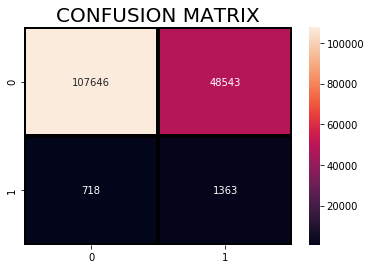

In [64]:
prob=classifier.predict_proba(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc,r2_score
sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

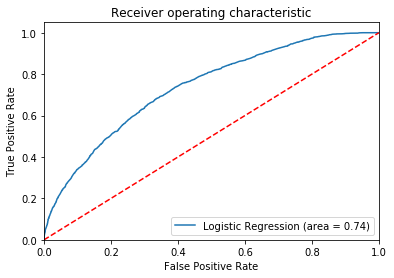

In [65]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test')
plt.show()

In [66]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, prob[:,1])

0.7361602688574771

In [67]:
classifier.coef_ 

array([[ 3.09591711e-01,  1.18441644e-01, -1.08764267e-01,
        -3.24270054e-01, -9.95663381e-01,  5.08525387e-01,
         3.09615746e-02, -6.39491310e-02, -2.85158027e-02,
        -1.33888120e-01, -3.32418237e-01,  2.84220065e-01,
         1.00482618e-01,  7.49142888e-02, -7.98384118e-02,
         7.55582236e-03,  2.77648745e-02,  9.68039842e-04,
         6.06473541e-02, -1.54600084e-02, -4.74144176e-02,
        -1.39022445e-01, -2.56038808e-02,  4.88138803e-02,
        -1.07089150e-02,  1.32773986e-02,  1.16510635e-01,
         1.70125760e-02, -1.02588869e-02,  7.41905685e-02,
        -7.96520927e-03,  2.39481428e-03, -1.02064074e-02,
        -7.25546710e-03,  0.00000000e+00,  1.85804718e-01,
         4.49750447e-03,  1.69317035e-02,  3.84825034e-04,
        -1.35775579e-02, -2.09574446e-02, -1.70023246e-02,
         1.28326449e-02, -2.32101496e-02,  3.96583444e-02,
         1.49366820e-02,  9.50597893e-03,  0.00000000e+00,
         1.06083850e-02,  1.29326281e-02, -9.09555259e-0

In [68]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=5)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

C:\Users\kbvbh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[155619,    570],
       [  2032,     49]], dtype=int64)

In [69]:
prob1=svc._predict_proba_lr(X_test)

In [70]:
prob1

array([[0.71489121, 0.28510879],
       [0.72814741, 0.27185259],
       [0.7232995 , 0.2767005 ],
       ...,
       [0.73483998, 0.26516002],
       [0.72908968, 0.27091032],
       [0.72750346, 0.27249654]])

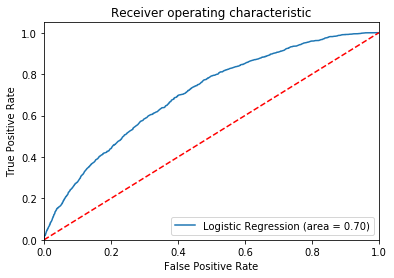

In [71]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob1[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test')
plt.show()

In [72]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, prob1[:,1])

0.7040533919973352

Accuracy= 0.986952675807165
Sensitivity= 0.00913022585295531
Specificity= 0.9999807925013925
Precision= 0.8636363636363636
F1= 0.01806942463147884


Text(0.5, 1, 'CONFUSION MATRIX')

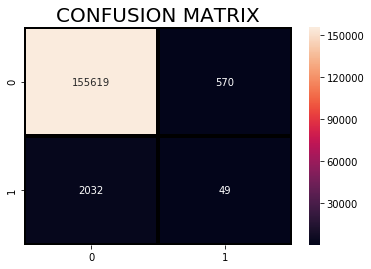

In [73]:
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print("Accuracy=",accuracy)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity=",sensitivity)
specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print("Specificity=",specificity)
precision= cm[1,1]/(cm[1,1]+cm[0,1])
print("Precision=",precision)
F1=2*(precision*sensitivity)/(precision+sensitivity)
print("F1=",F1)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc,r2_score
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

In [93]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier(n_estimators=50, max_depth=20, max_features=None,min_samples_leaf = 50)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [94]:
prob3=rfc.predict_proba(X_test)

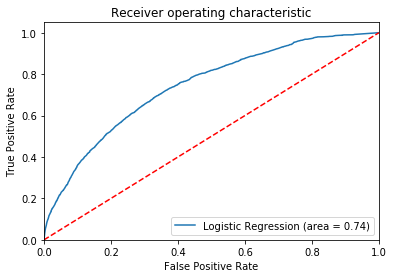

In [95]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob3[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_test')
plt.show()

In [96]:
import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, prob3[:,1])

0.7424710766621971

Accuracy= 0.986952675807165
Sensitivity= 0.00913022585295531
Specificity= 0.9999807925013925
Precision= 0.8636363636363636
F1= 0.01806942463147884


Text(0.5, 1, 'CONFUSION MATRIX')

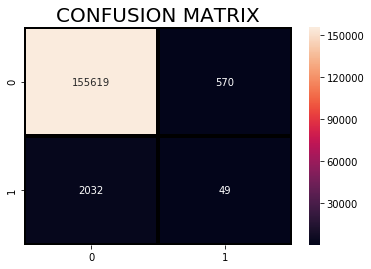

In [84]:
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print("Accuracy=",accuracy)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print("Sensitivity=",sensitivity)
specificity = cm[0,0]/(cm[0,1]+cm[0,0])
print("Specificity=",specificity)
precision= cm[1,1]/(cm[1,1]+cm[0,1])
print("Precision=",precision)
F1=2*(precision*sensitivity)/(precision+sensitivity)
print("F1=",F1)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve,auc,r2_score
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

In [79]:
rfc.coef_

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'